In [1]:
#importando pacotes
import pandas as pd
import seaborn as srn
import statistics as sts
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew 
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#carregando dados
dataset = pd.read_csv("Train.csv")
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#mostra a ocorrencias de NAs no datasets
dataset.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [4]:
#buscamos duplicados 
dataset[dataset.duplicated(['Id'],keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [5]:
dataset = dataset.drop(['Id'], axis = 1)
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


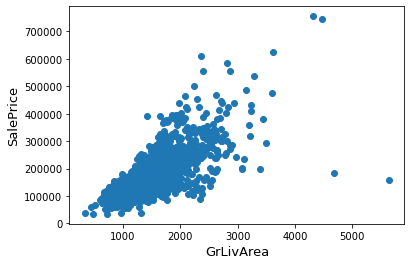

In [6]:
# verificando outliers
fig, ax = plt.subplots()
ax.scatter(x = dataset['GrLivArea'], y = dataset['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

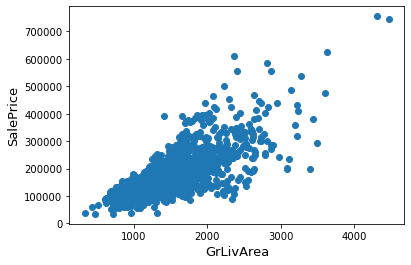

In [7]:
# removendo os outliers
dataset = dataset.drop(dataset[(dataset['GrLivArea']>4000) & (dataset['SalePrice']<300000)].index)

fig, ax = plt.subplots()
ax.scatter(dataset['GrLivArea'], dataset['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [8]:
def plot_distribution(data, plot_name):
    srn.histplot(data, kde = True);
    (mu, sigma) = norm.fit(data)
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
                loc='best')
    plt.ylabel('Frequency')
    plt.title(plot_name)

    fig = plt.figure()
    res = stats.probplot(data, plot=plt)
    plt.show()

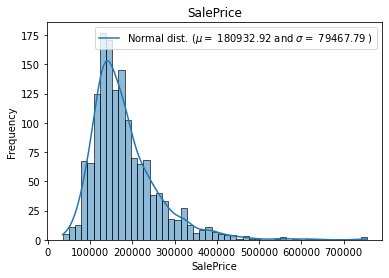

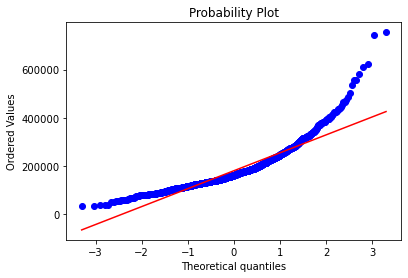

In [9]:
plot_distribution(dataset['SalePrice'], 'SalePrice')

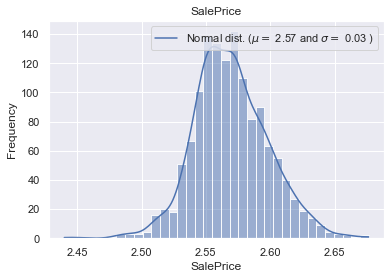

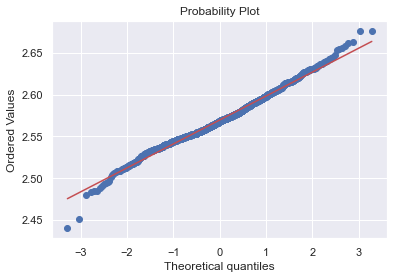

In [44]:
# normalizando os dados dos preços com log10
dataset["SalePrice"] = np.log1p(dataset["SalePrice"])

# verificando a distribuição 
plot_distribution(dataset['SalePrice'], 'SalePrice')

<AxesSubplot:>

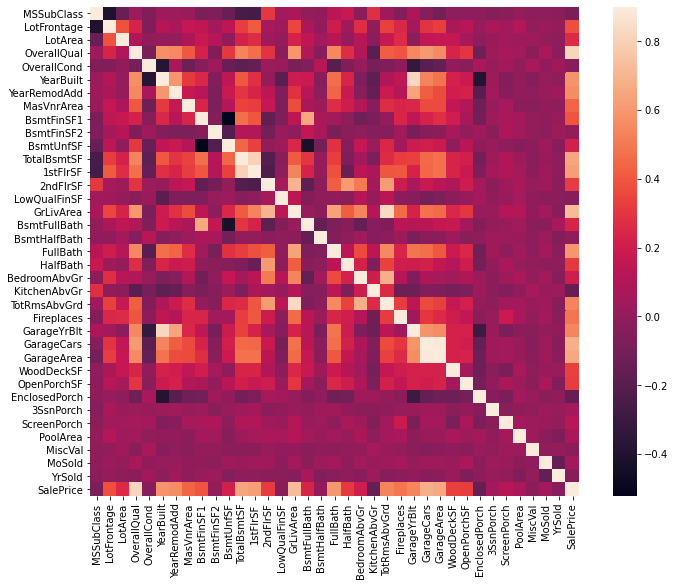

In [12]:
# matrix de correlação
corrmat = dataset.corr()
plt.subplots(figsize=(12,9))
srn.heatmap(corrmat, vmax=0.9, square=True)

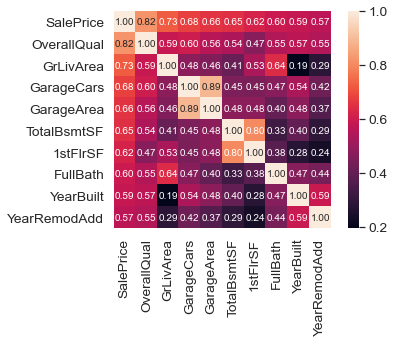

In [13]:
#matrix de correlação
k = 10 # número de variáveis do heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(dataset[cols].values.T)
srn.set(font_scale=1.25)
hm = srn.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

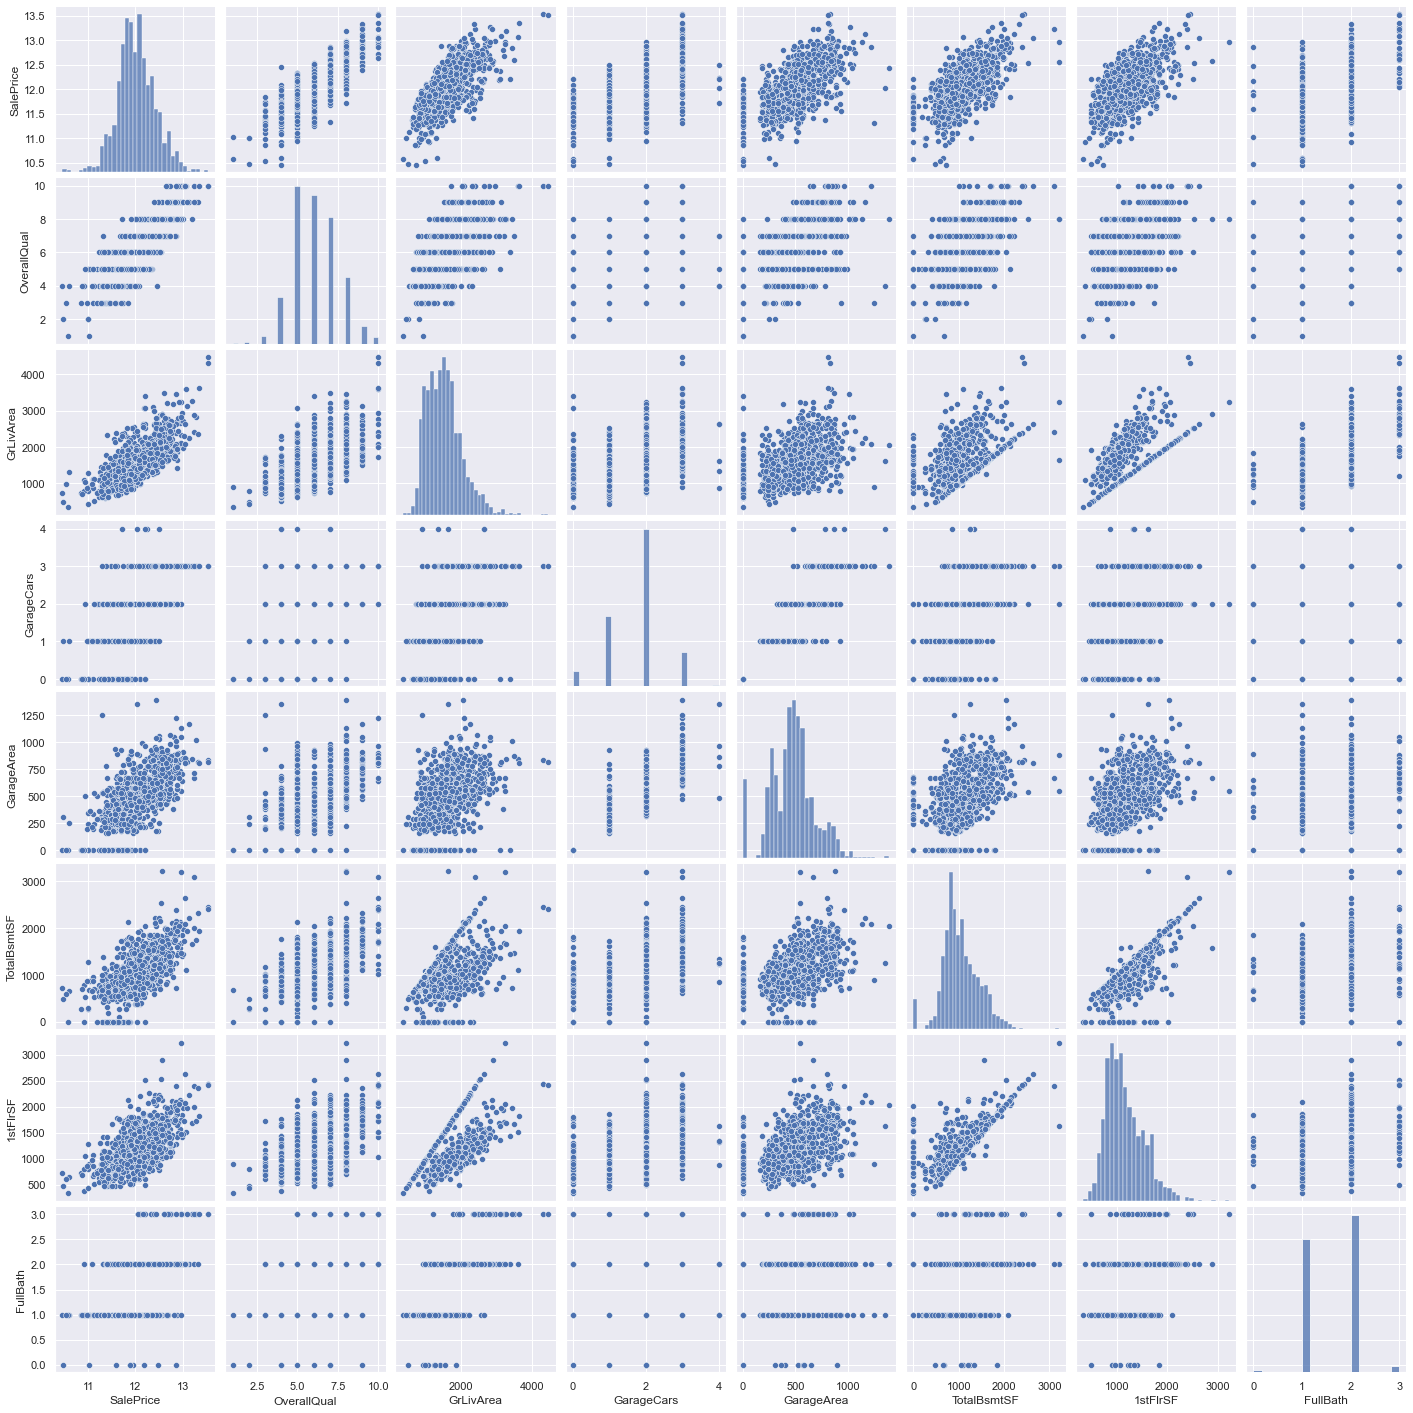

In [14]:
# correlação entre preço e as características mais relacionadas
srn.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath']
srn.pairplot(dataset[cols], height = 2.5)
plt.show();

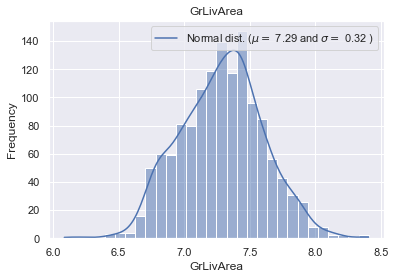

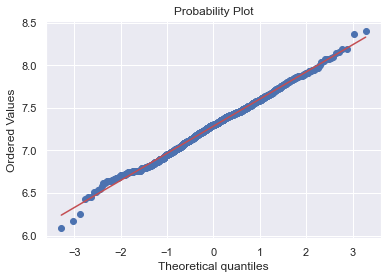

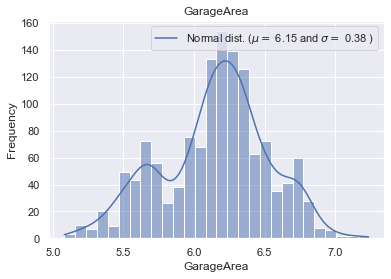

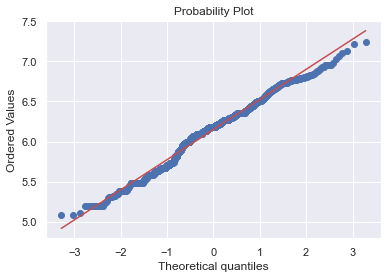

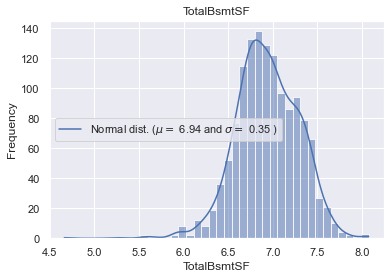

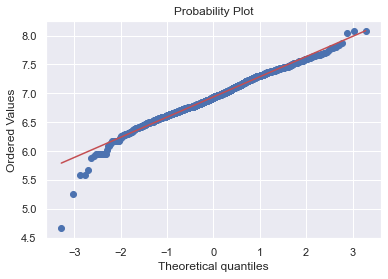

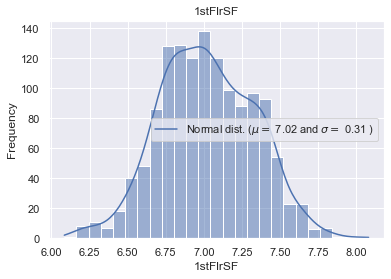

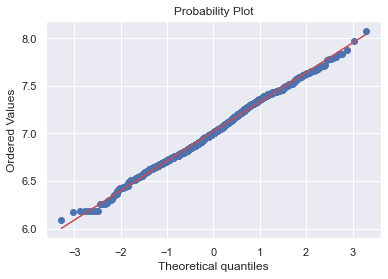

In [45]:
# verificando a distribuição 
plot_distribution(dataset['GrLivArea'], 'GrLivArea')
plot_distribution(dataset['GarageArea'], 'GarageArea')
plot_distribution(dataset['TotalBsmtSF'], 'TotalBsmtSF')
plot_distribution(dataset['1stFlrSF'], '1stFlrSF')

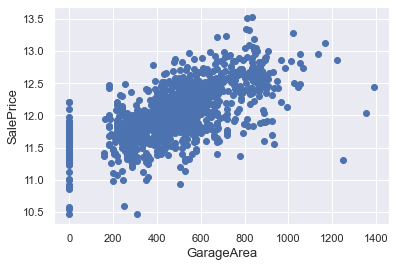

In [16]:
# verificando os outliers de GarageArea
fig, ax = plt.subplots()
ax.scatter(dataset['GarageArea'], dataset['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GarageArea', fontsize=13)
plt.show()

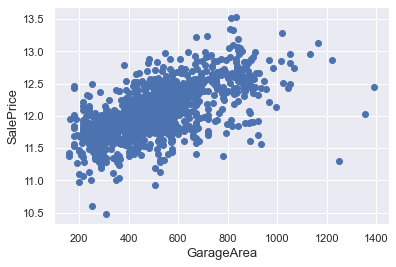

In [17]:
# removendo os outliers de GarageArea
dataset = dataset.drop(dataset[(dataset['GarageArea']<1) & (dataset['SalePrice']<300000)].index)

fig, ax = plt.subplots()
ax.scatter(dataset['GarageArea'], dataset['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GarageArea', fontsize=13)
plt.show()

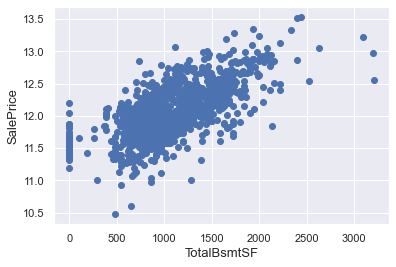

In [18]:
# verificando os outliers de TotalBsmtSF
fig, ax = plt.subplots()
ax.scatter(dataset['TotalBsmtSF'], dataset['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

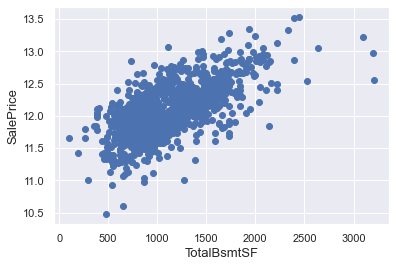

In [19]:
# removendo os outliers de TotalBsmtSF
dataset = dataset.drop(dataset[(dataset['TotalBsmtSF']<1) & (dataset['SalePrice']<300000)].index)

fig, ax = plt.subplots()
ax.scatter(dataset['TotalBsmtSF'], dataset['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

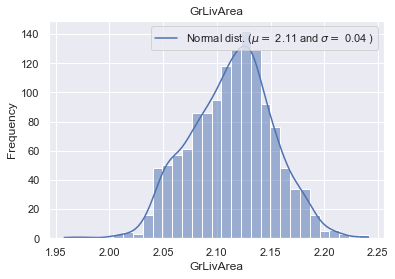

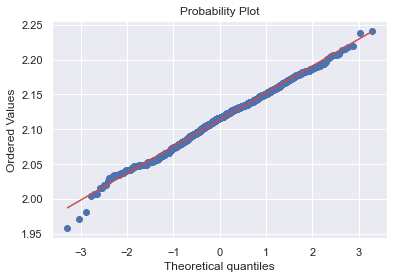

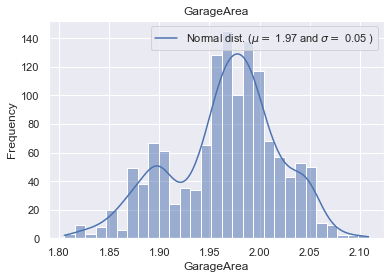

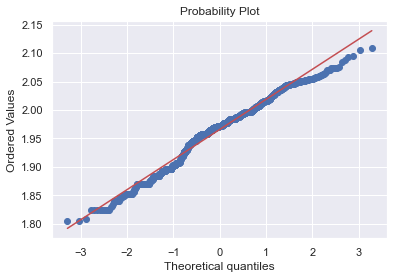

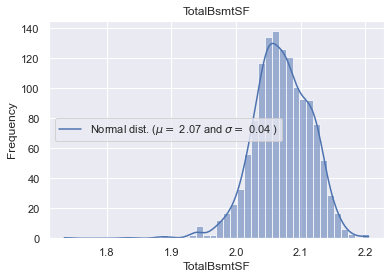

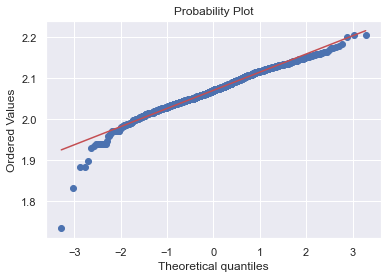

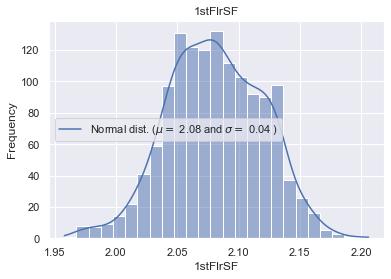

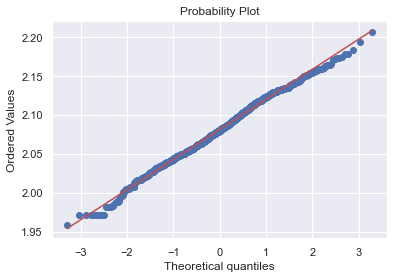

In [46]:
# normalizando os dados dos preços com log10
dataset["GrLivArea"] = np.log1p(dataset["GrLivArea"])
dataset["GarageArea"] = np.log1p(dataset["GarageArea"])
dataset["TotalBsmtSF"] = np.log1p(dataset["TotalBsmtSF"])
dataset["1stFlrSF"] = np.log1p(dataset["1stFlrSF"])

# verificando a distribuição 
plot_distribution(dataset['GrLivArea'], 'GrLivArea')
plot_distribution(dataset['GarageArea'], 'GarageArea')
plot_distribution(dataset['TotalBsmtSF'], 'TotalBsmtSF')
plot_distribution(dataset['1stFlrSF'], '1stFlrSF')

In [21]:
# selecionando os dados que importam
dataset = dataset.loc[:, ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'SalePrice']]
dataset.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,SalePrice
0,7,7.444833,2,6.308098,6.753438,6.753438,2,12.247699
1,6,7.141245,2,6.133398,7.141245,7.141245,2,12.109016
2,7,7.488294,2,6.411818,6.825460,6.825460,2,12.317171
3,7,7.448916,3,6.466145,6.629363,6.869014,1,11.849405
4,8,7.695758,3,6.729824,7.044033,7.044033,2,12.429220


In [22]:
# delimitando o modelo de predição (regressão múltipla)

x = dataset.iloc[:, 0:6].values
y = dataset.iloc[:, 7].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=16)

model = LinearRegression()
model.fit(x_train, y_train)

predictions = model.predict(x_test)

Text(0, 0.5, 'Preços preditos')

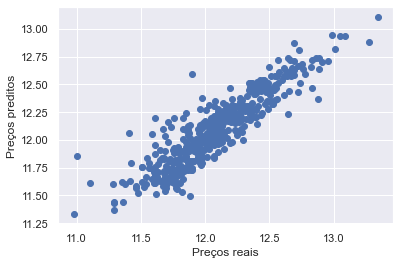

In [23]:
plt.scatter(y_test, predictions)
plt.xlabel("Preços reais")
plt.ylabel("Preços preditos")

In [24]:
# r2, coeficiente de determinação
model.score(x_test, y_test)

0.8092391384603803

In [25]:
# calculando o erro do modelo
metrics.mean_squared_error(y_test, predictions)

0.026115709182817023

In [26]:
#carregando dados de teste
test = pd.read_csv("Test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [27]:
# selecionando os dados que importam
test = test.loc[:, ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'Id']]
test.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,Id
0,5,896,1.0,730.0,882.0,896,1,1461
1,6,1329,1.0,312.0,1329.0,1329,1,1462
2,5,1629,2.0,482.0,928.0,928,2,1463
3,6,1604,2.0,470.0,926.0,926,2,1464
4,8,1280,2.0,506.0,1280.0,1280,2,1465


In [28]:
# selecionando os dados
X = test.iloc[:, 0:7].values

In [29]:
#mostra a ocorrencias de NAs no datasets
test.isnull().sum()

OverallQual    0
GrLivArea      0
GarageCars     1
GarageArea     1
TotalBsmtSF    1
1stFlrSF       0
FullBath       0
Id             0
dtype: int64

In [30]:
median1 = sts.median(dataset['GarageCars'])
median2 = sts.median(dataset['GarageArea'])
median3 = sts.median(dataset['TotalBsmtSF'])
test['GarageCars'].fillna(median1, inplace=True)
test['GarageArea'].fillna(median2, inplace=True)
test['TotalBsmtSF'].fillna(median3, inplace=True)

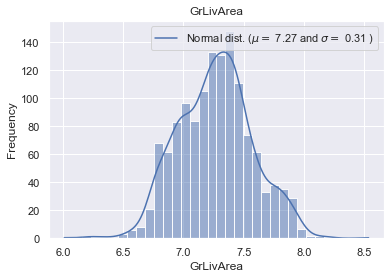

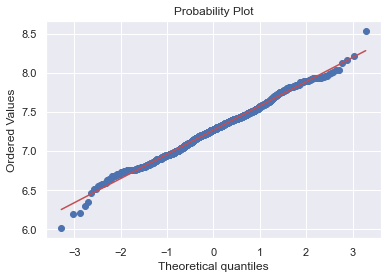

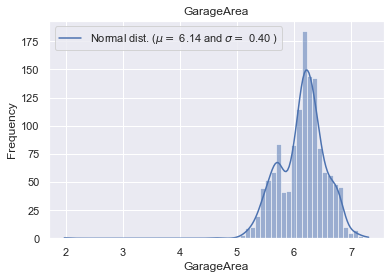

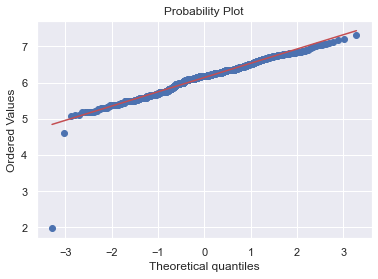

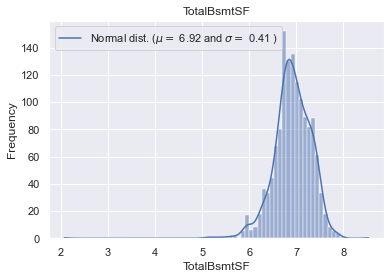

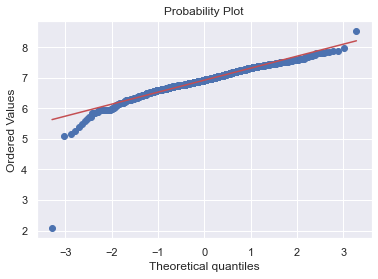

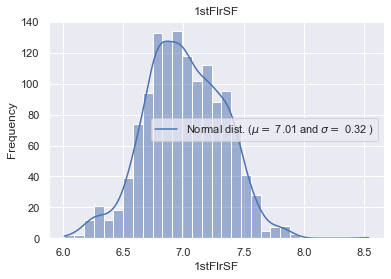

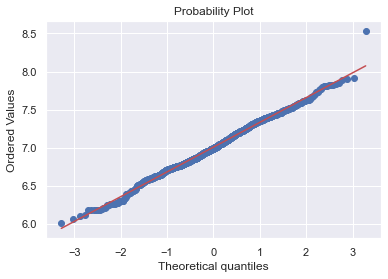

In [47]:
# verificando a distribuição 
plot_distribution(test['GrLivArea'], 'GrLivArea')
plot_distribution(test['GarageArea'], 'GarageArea')
plot_distribution(test['TotalBsmtSF'], 'TotalBsmtSF')
plot_distribution(test['1stFlrSF'], '1stFlrSF')

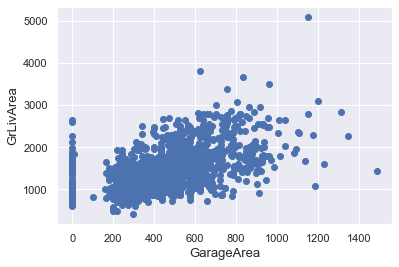

In [32]:
# verificando os outliers de GarageArea
fig, ax = plt.subplots()
ax.scatter(test['GarageArea'], test['GrLivArea'])
plt.ylabel('GrLivArea', fontsize=13)
plt.xlabel('GarageArea', fontsize=13)
plt.show()

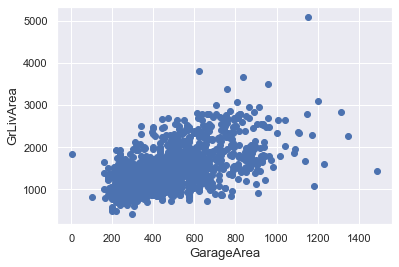

In [33]:
# removendo os outliers de GarageArea
test = test.drop(test[(test['GarageArea']<3) & (test['GrLivArea']<4000)].index)

fig, ax = plt.subplots()
ax.scatter(test['GarageArea'], test['GrLivArea'])
plt.ylabel('GrLivArea', fontsize=13)
plt.xlabel('GarageArea', fontsize=13)
plt.show()

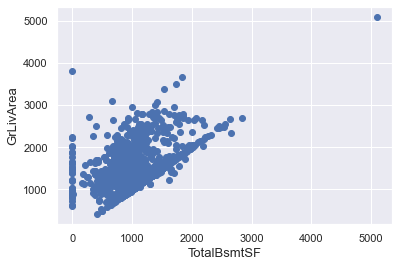

In [34]:
# verificando os outliers de TotalBsmtSF
fig, ax = plt.subplots()
ax.scatter(test['TotalBsmtSF'], test['GrLivArea'])
plt.ylabel('GrLivArea', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

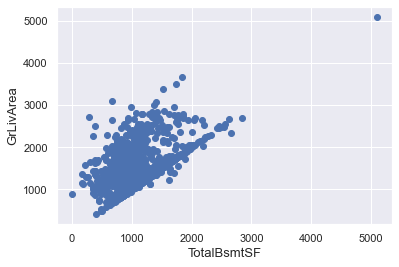

In [35]:
# removendo os outliers de TotalBsmtSF
test = test.drop(test[(test['TotalBsmtSF']<3) & (test['GrLivArea']<4000)].index)

fig, ax = plt.subplots()
ax.scatter(test['TotalBsmtSF'], test['GrLivArea'])
plt.ylabel('GrLivArea', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

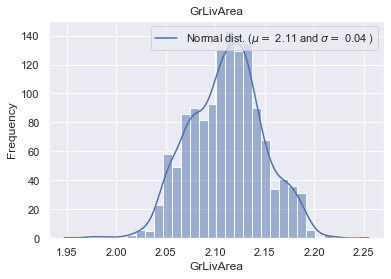

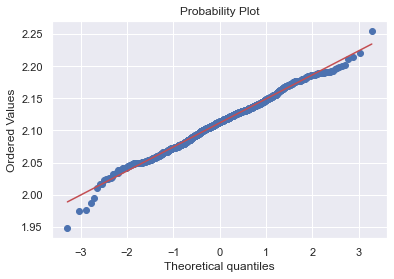

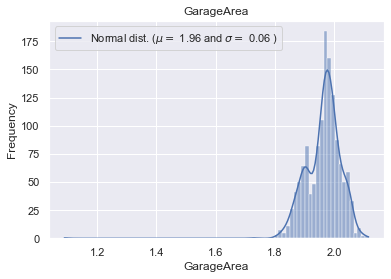

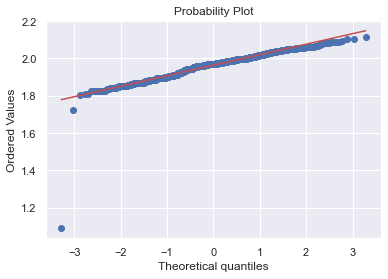

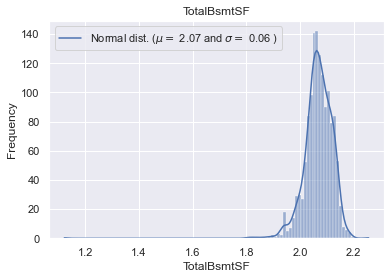

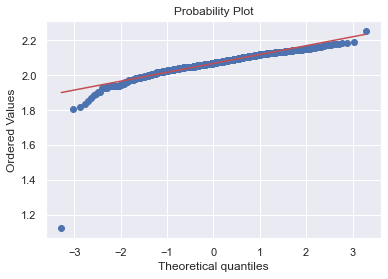

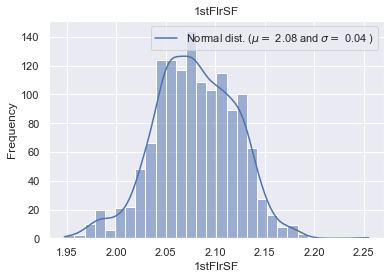

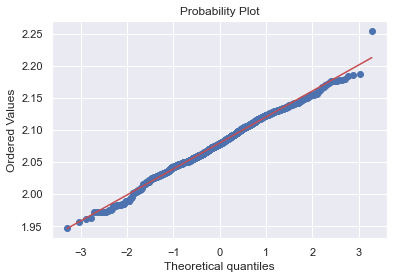

In [48]:
# normalizando os dados dos preços com log10
test["GrLivArea"] = np.log1p(test["GrLivArea"])
test["GarageArea"] = np.log1p(test["GarageArea"])
test["TotalBsmtSF"] = np.log1p(test["TotalBsmtSF"])
test["1stFlrSF"] = np.log1p(test["1stFlrSF"])

# verificando a distribuição 
plot_distribution(test['GrLivArea'], 'GrLivArea')
plot_distribution(test['GarageArea'], 'GarageArea')
plot_distribution(test['TotalBsmtSF'], 'TotalBsmtSF')
plot_distribution(test['1stFlrSF'], '1stFlrSF')

In [37]:
# Previsões utilizando os registros de teste
result = model.predict(test.iloc[:, 0:6].values)

In [38]:
# removendo o log10 dos preços das casas
result = np.exp(result)

In [39]:
result

array([117719.29636964, 161827.17871689, 152132.96071356, ...,
        93381.60305228, 148649.47167007, 229785.32367143])

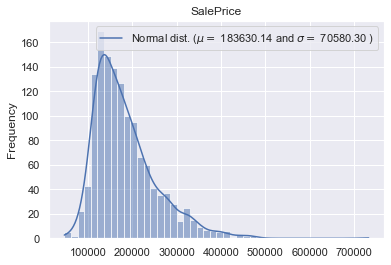

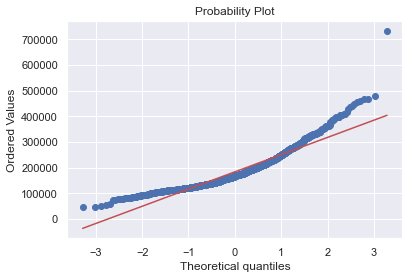

In [49]:
# verificando a distribuição 
plot_distribution(result, 'SalePrice')

In [41]:
# criando o arquivo de submissão
solution = pd.DataFrame({"id":test.Id, "SalePrice": result})

In [42]:
solution

,id,SalePrice
0,1461,117719.296370
1,1462,161827.178717
2,1463,152132.960714
3,1464,170970.543921
4,1465,220204.851542
...,...,...
1451,2912,140849.974322
1452,2913,93381.603052
1455,2916,93381.603052
1456,2917,148649.471670


In [43]:
solution.to_csv("HousePriceSolution.csv", index = False)